In [3]:
# Librerias utilizadas en el proyecto

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Paso 1: Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [4]:
data = pd.read_csv('./Titanic-Dataset.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# Observamos los estadisticos descriptivos de la base de datos
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


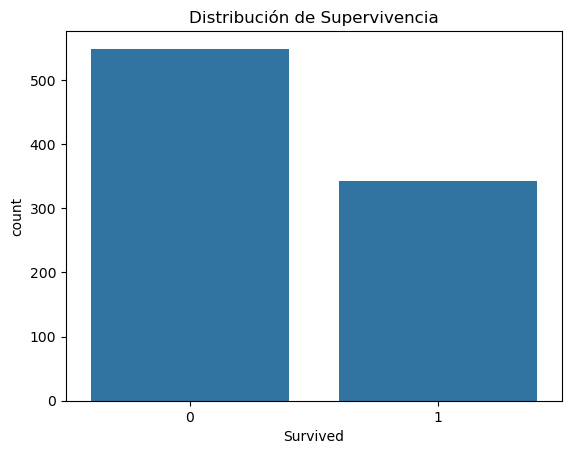

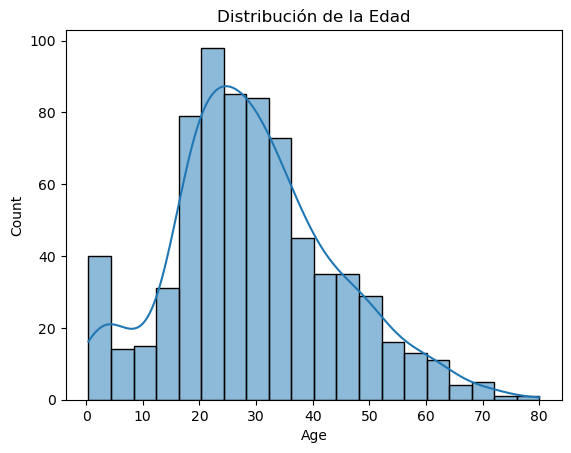

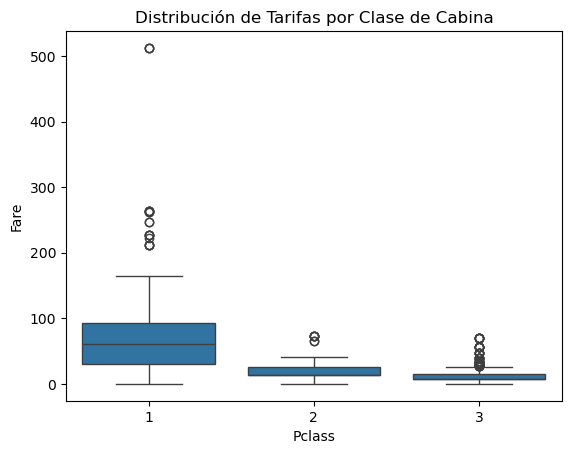

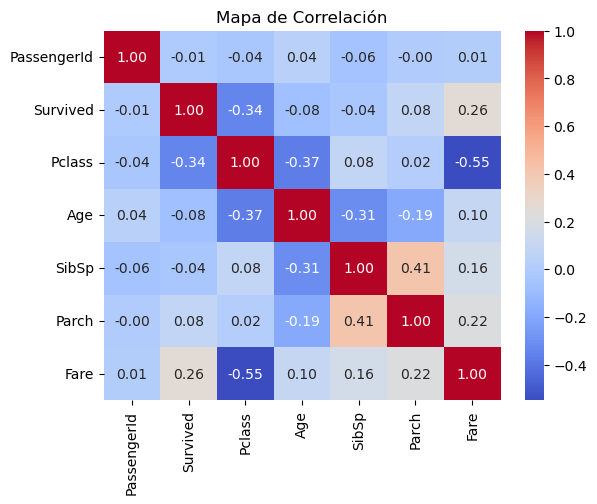

In [11]:
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Distribución de la variable objetivo 'Survived'
sns.countplot(x='Survived',data=data)
plt.title('Distribución de Supervivencia')
plt.show()

# Distribución de la edad
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Distribución de la Edad')
plt.show()

# Boxplot de tarifas (Fare) por clase de cabina (Pclass)
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Distribución de Tarifas por Clase de Cabina')
plt.show()

# Seleccionar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación
correlation = numerical_data.corr()

# Graficar el heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación')
plt.show()

# Paso 2: Preprocesamiento de los Datos


In [33]:
# Llenar valores faltantes en la columna "Age" con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

# Codificar variables categóricas (Sexo y Embarque)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Eliminar columnas irrelevantes si están presentes en el DataFrame
columnas_a_eliminar = ['PassengerId', 'Name', 'Ticket', 'Cabin']
columnas_existentes = [col for col in columnas_a_eliminar if col in data.columns]

if columnas_existentes:
    data.drop(columns=columnas_existentes, axis=1, inplace=True)
    print(f"Columnas eliminadas: {columnas_existentes}")
else:
    print("No hay columnas irrelevantes para eliminar.")

# Mostrar los datos preprocesados
print("Datos después del preprocesamiento:")
print(data.head())



No hay columnas irrelevantes para eliminar.
Datos después del preprocesamiento:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3  NaN  22.0      1      0   7.2500       NaN
1         1       1  NaN  38.0      1      0  71.2833       NaN
2         1       3  NaN  26.0      0      0   7.9250       NaN
3         1       1  NaN  35.0      1      0  53.1000       NaN
4         0       3  NaN  35.0      0      0   8.0500       NaN


# Paso 3: Selección de Características

In [62]:
# Observamos la informacion de la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       0 non-null      float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  0 non-null      float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [48]:
# Ver correlación con la variable objetivo 'Survived'
print("Correlación con Survived:")
print(data.corr()['Survived'])

# Para este ejercicio seleccionamos las columnas: 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[selected_features]
y = data['Survived']

Correlación con Survived:
Survived    1.000000
Pclass     -0.338481
Sex              NaN
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked         NaN
Name: Survived, dtype: float64


In [52]:
# Filtramos las clases con más de 1 muestra
valid_classes = Y.value_counts()[Y.value_counts() > 1].index
X_filtered = X[Y.isin(valid_classes)]
Y_filtered = Y[Y.isin(valid_classes)]

# Dividimos los datos
X_train, X_test, Y_train, Y_test = train_test_split(
    X_filtered, Y_filtered, test_size=0.25, stratify=Y_filtered, random_state=0
)

# Imprimimos el conjunto de características de entrenamiento
print("Conjunto de características de entrenamiento (X_train):")
print(X_train.head())

Conjunto de características de entrenamiento (X_train):
     Survived  Pclass  Sex  SibSp  Parch    Fare  Embarked
718         0       3  NaN      0      0  15.500       NaN
110         0       1  NaN      0      0  52.000       NaN
149         0       2  NaN      0      0  13.000       NaN
222         0       3  NaN      0      0   8.050       NaN
840         0       3  NaN      0      0   7.925       NaN


In [58]:
# Imprimimos los datos de la variable dependiente de entrenamiento
print(Y_train)

718    28.0
110    47.0
149    42.0
222    51.0
840    20.0
       ... 
150    51.0
716    38.0
134    25.0
145    19.0
886    27.0
Name: Age, Length: 656, dtype: float64


# Paso 4: Dividir el Dataset en Train y Test

In [66]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (623, 7)
Tamaño del conjunto de prueba: (268, 7)


# Paso 5: Entrenar el Modelo

In [75]:
# Entrenar el modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Entrenamiento completado.")

Entrenamiento completado.


# Paso 6: Evaluar el Desempeño del Modelo

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        84

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



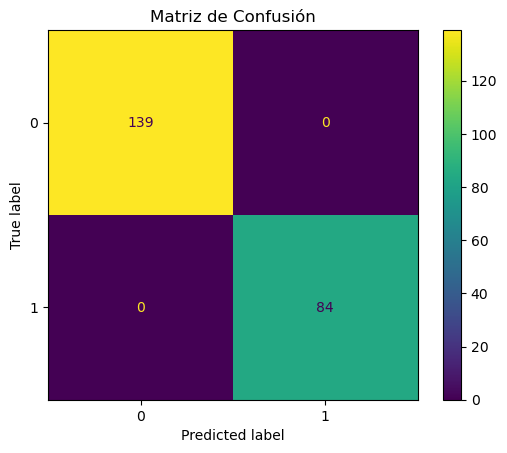

In [78]:
# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test)

# Generar métricas de evaluación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Matriz de Confusión')
plt.show()

# Paso 7: Gráficas para Visualizar Resultados

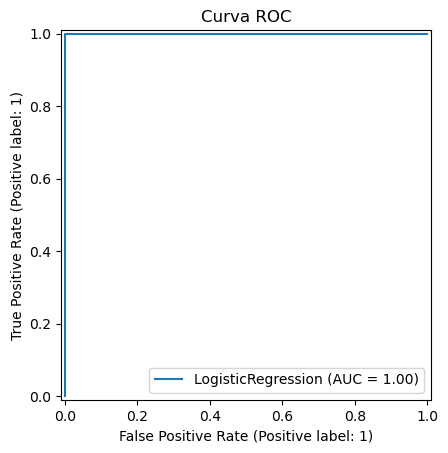

In [81]:
# Curva ROC
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title('Curva ROC')
plt.show()